In [1]:
import cv2 # import the opencv library
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from PIL import Image

#Authorize Colab to access your files in Google Drive
image1 = cv2.imread("image/exampleimage.jpg")

## **Load image**

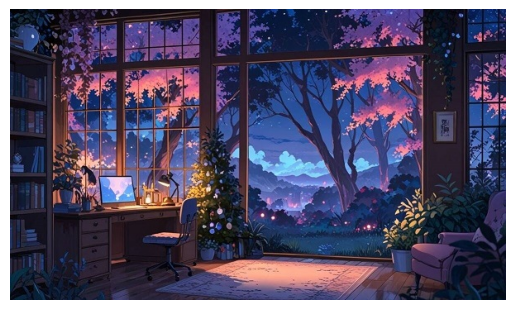

In [2]:
image_RGB = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image_RGB)
plt.axis("off")
plt.show()

In [3]:
def display(image1):
    # Insert your code here
    if len(image1.shape) == 2 or \
       (len(image1.shape) == 3 and image1.shape[2]==1):
     image1 = cv2.cvtColor(image1, cv2.COLOR_GRAY2BGR)
    plt.imshow(image1)
    plt.axis("off")
    plt.show()

# **1. Smoothing**
##**Smooting** to reduce noise


Ref: https://opencv.org/blog/image-filtering-using-convolution-in-opencv/

## **1.1 Generalized Averaging Filter (Box Blur)**

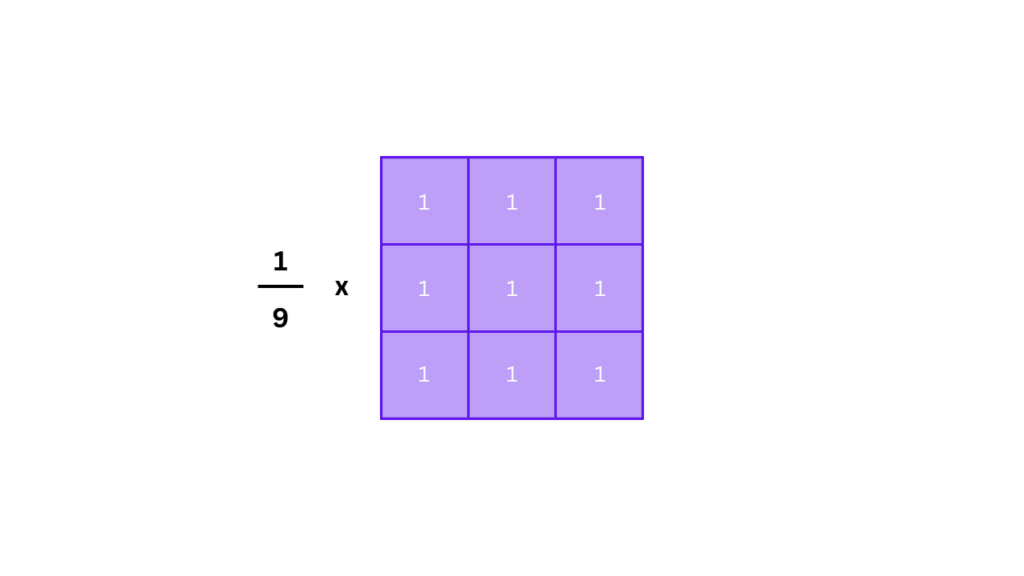


##Box Filter using cv2.blur " Simple averaging "

In [4]:
def box_blur(image1, kernel_size=7):
    ksize = (kernel_size,kernel_size)
    # Box Filter using cv2.blur ** simple averaging **
    box1 = image1.copy()
    box1 = cv2.blur(box1, ksize)

    # Box filter Using cv2.boxfilter ** more control **
    box2 = image1.copy()
    box2 = cv2.boxFilter(box2, -1, ksize, normalize=True)

    return box1, box2

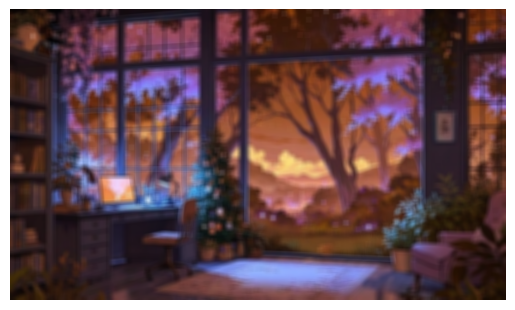

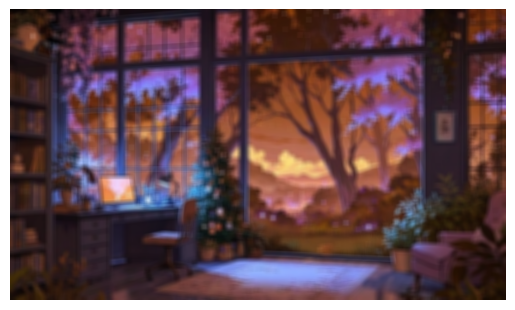

In [5]:
box1, box2 = box_blur(image1)
display(box1)
display(box2)

## **1.2 Gaussian Blur**

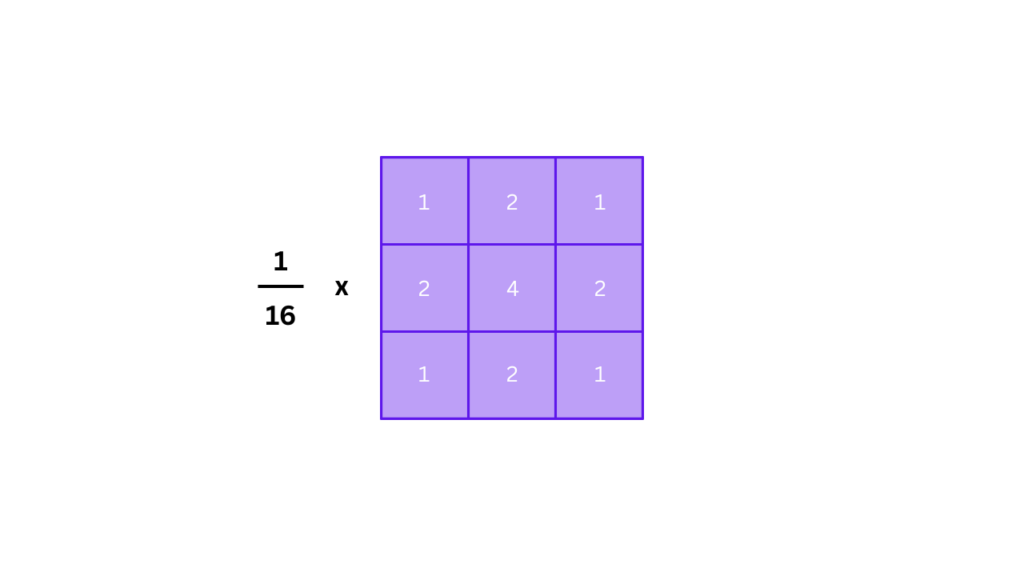

In [6]:
def gaussian_blur(image1, kernal_size=7):
    #Insert your code here
    ksize = (kernal_size, kernal_size)
    #kernal size = 7x7 pixel
    gaussing = cv2.GaussianBlur(image1, ksize, 0)
    print("gaussing")
    return gaussing

gaussing


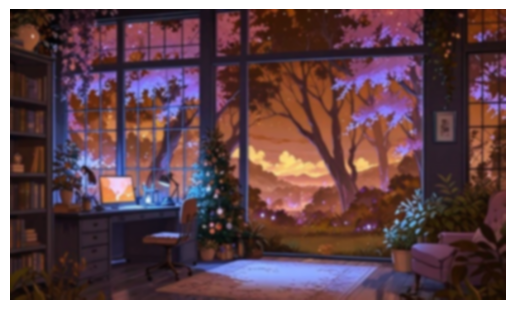

In [7]:
gaussian_image = gaussian_blur(image1)
display(gaussian_image)

## **1.3 Median Blur**

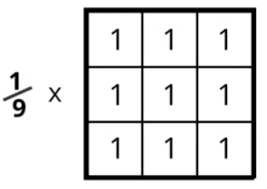

In [8]:
def median_blur(image1, kernal_size=7):
    # Insert your code here
    median = cv2.medianBlur(image1, kernal_size)
    print("median Blur")
    return median

median Blur


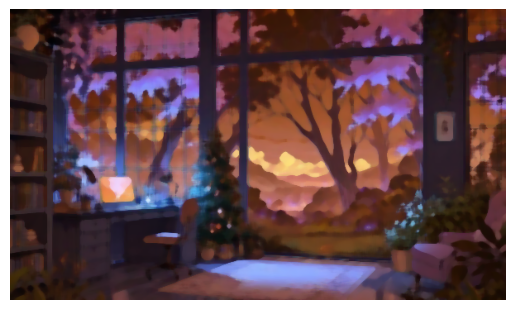

In [9]:
median_image = median_blur(image1)
display(median_image)

## **1.4 Bilateral Filter**

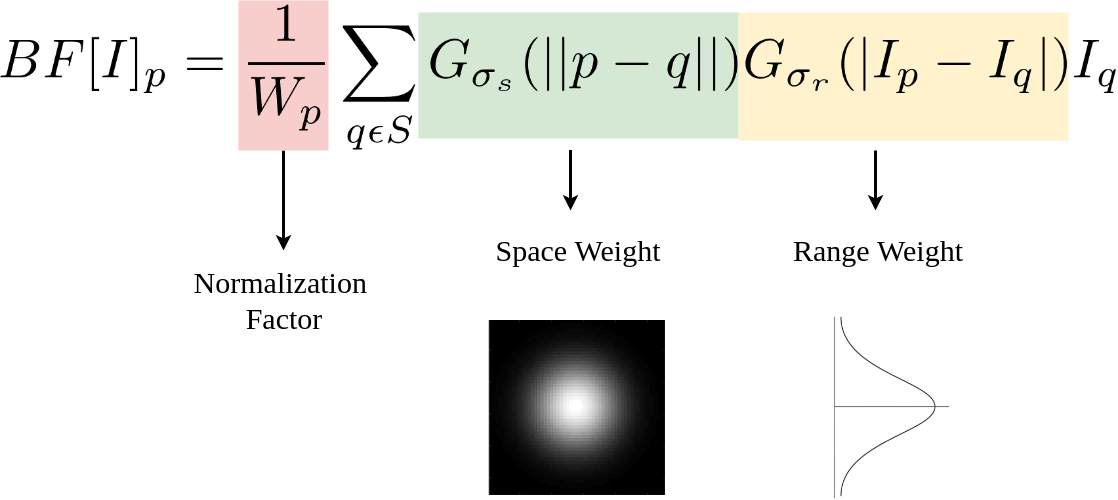

In [10]:
def bilateral_filter(image1):
    #Insert your code here
    bilateral = cv2.bilateralFilter(image1, 9,75,75)
    print("bilateral Filter")
    return bilateral

bilateral Filter


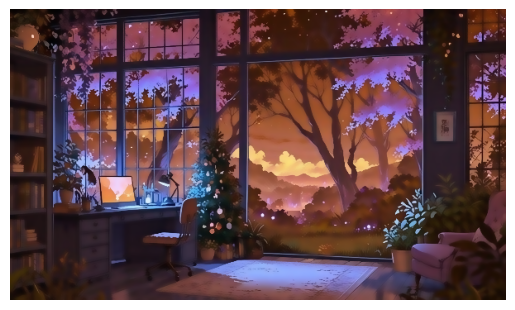

In [11]:
bilateral_image = bilateral_filter(image1)
display(bilateral_image)

## **1.5 Custom Sharpening Filter**

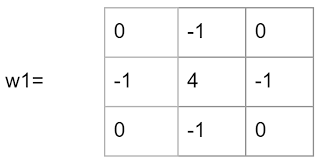

In [12]:
def sharpened(image1, kernal):
    # Insert your code here
    sharpened = cv2.filter2D(image1, -1,kernal)
    print("Custom Sharpening filter")
    return sharpened

Custom Sharpening filter


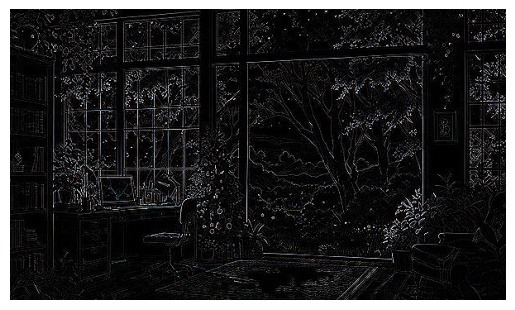

In [13]:
# Insert your code here
# step1 Create kernal, step2 call the sharpened function and display the result.
kernal = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])
sharpened_image = sharpened(image1, kernal)
display(sharpened_image)

(np.float64(-0.5), np.float64(599.5), np.float64(351.5), np.float64(-0.5))

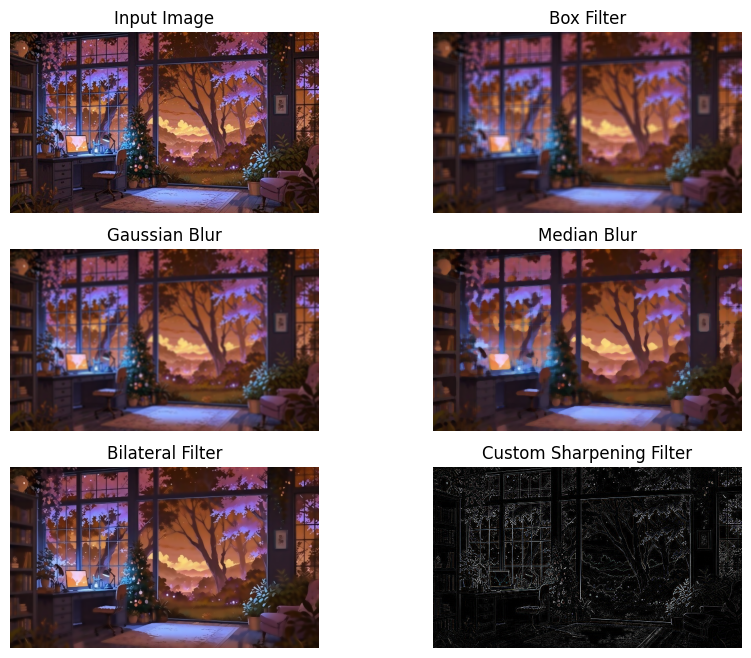

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
axs[0, 0].imshow(image1)
axs[0, 0].set_title('Input Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(box1)
axs[0, 1].set_title('Box Filter')
axs[0, 1].axis('off')

axs[1, 0].imshow(gaussian_image)
axs[1, 0].set_title('Gaussian Blur')
axs[1, 0].axis('off')

axs[1, 1].imshow(median_image)
axs[1, 1].set_title('Median Blur')
axs[1, 1].axis('off')

axs[2, 0].imshow(bilateral_image)
axs[2, 0].set_title('Bilateral Filter')
axs[2, 0].axis('off')

axs[2, 1].imshow(sharpened_image)
axs[2, 1].set_title('Custom Sharpening Filter')
axs[2, 1].axis('off')

# **2. Filters and Edge**

## **2.1 Sobel Operator**
Gx (horizontal changel):

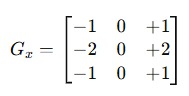

Gy (vertical changes):


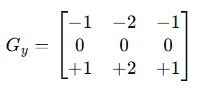

Gradient magnitured:


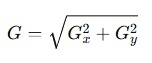


or Approximation:


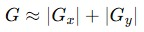


In [15]:
def sobel_filter(image1):
    # Insert your code as follows:
    # Step1: Convert RGB to Gray
    image_gray = cv2.cvtColor(image1,cv2.COLOR_RGB2GRAY)
    # Step2: Apply Soble operator Gx, and Gy
    sobelx = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)
    # Setp3: Compute gradient magnitude
    gradient_magnitude = cv2.magnitude(sobelx, sobely)
    # Setp4: Convert ot unit8
    gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)

    print("Sobel Operator")
    # Return result
    return gradient_magnitude

Sobel Operator


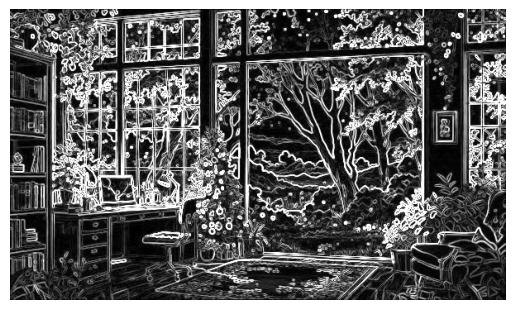

In [16]:
# Call the sobel_filter function and display the reslt
# Insert your code here
sobel_image = sobel_filter(image1)
display(sobel_image)

## **2.2 Laplacian Operator**

The Laplacian operator is defined as:

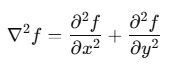

##**Common kernels:**

4-neighbor kernal:

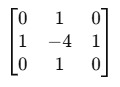

8-neighbor kernel:


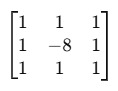




In [17]:
def laplacian_filter(image1):
    # Insert your code as follows:
    # Step1: Convert RGB to GRAY
    img_gray = cv2.cvtColor(image1,cv2.COLOR_RGB2GRAY)
    # Step2: Apply Laplician operator
    laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)
    # Step 3: Convert to unit8
    laplacian = cv2.convertScaleAbs(laplacian)

    print("Laplacian Operator")

    return laplacian

Laplacian Operator


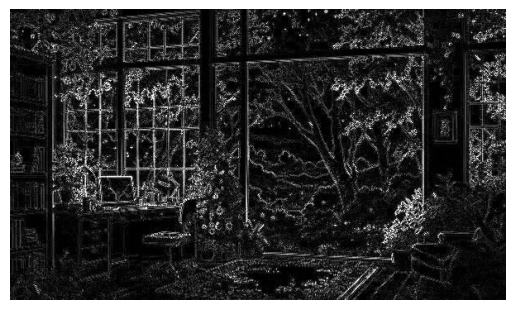

In [18]:
# Call the laplacian_filter and display result
# Insert your code here
laplacian_image = laplacian_filter(image1)
display(laplacian_image)